# 03 - Noise Management (RANSAC)

In [2]:
# import libraries as usuall
import pandas as pd
import numpy as np
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
pd.set_option('display.float_format', '{:.1f}'.format)
df = pd.read_csv("Numeric data (last year work).csv")

In [5]:
# define features and target
target_column = 'Rating'
features = df.drop(columns=[target_column])
target = df[target_column]

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [6]:
# train a Linear Regression model for comparison
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predictions_linear = linear_model.predict(X_test)

In [15]:
# Evaluate Linear Regression
print("Linear Regression Metrics (without any imporvement):")
print("MAE:", round(mean_absolute_error(y_test, predictions_linear), 2))
print("MSE:", round(mean_squared_error(y_test, predictions_linear), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, predictions_linear)), 2))
print("R-squared:", round(r2_score(y_test, predictions_linear), 2))


Linear Regression Metrics (without any imporvement):
MAE: 0.29
MSE: 0.13
RMSE: 0.36
R-squared: 0.55


C:\Users\e1003118\AppData\Local\Temp\ipykernel_21892\3847528053.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions_linear), kde=True)


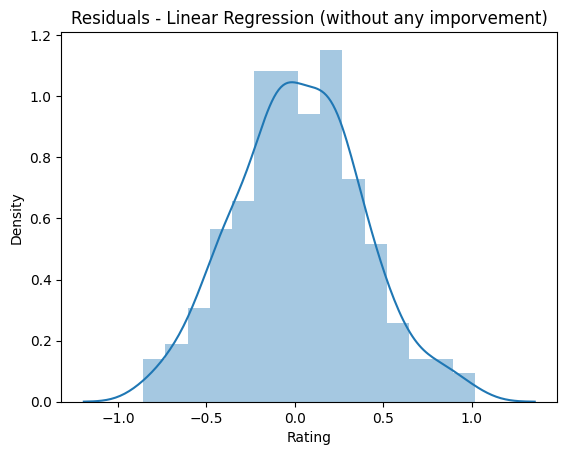

In [16]:
sns.distplot((y_test - predictions_linear), kde=True)
plt.title("Residuals - Linear Regression (without any imporvement)")
plt.show()

In [10]:
# and now let's implement RANSAC and compare results

# train a RANSAC Regressor
ransac = RANSACRegressor(estimator=LinearRegression(), random_state=42)
ransac.fit(X_train, y_train)
predictions_ransac = ransac.predict(X_test)

In [11]:
# Evaluate RANSAC Regressor
print("\nRANSAC Regression Metrics (With Noise Management):")
print("MAE:", round(mean_absolute_error(y_test, predictions_ransac), 2))
print("MSE:", round(mean_squared_error(y_test, predictions_ransac), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, predictions_ransac)), 2))
print("R-squared:", round(r2_score(y_test, predictions_ransac), 2))



RANSAC Regression Metrics (With Noise Management):
MAE: 0.3
MSE: 0.14
RMSE: 0.37
R-squared: 0.51


C:\Users\e1003118\AppData\Local\Temp\ipykernel_21892\4001851773.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions_ransac), kde=True)


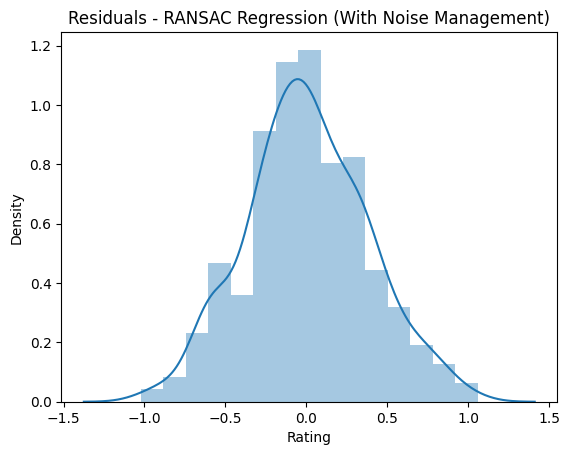

In [12]:
sns.distplot((y_test - predictions_ransac), kde=True)
plt.title("Residuals - RANSAC Regression (With Noise Management)")
plt.show()

In [ ]:
# insights:

# we can see that data now it more balanced
# it does not have 2 clear picks
# as it was before

# metrics imporved a bit 
# but there is no big changes
# and r-squared dropped

# I googled why it could happen
# If the original data is not significantly noisy 
# or does not have many outliers, 
# RANSAC might exclude data points unnecessarily.